In [10]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation:

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [11]:
# setting up the problem
target = 'Genetic Algorithm'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' '] # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

    population = []
    for _ in range(pop_size):
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['bWITELbzhKgEAguzy',
 'UwVTZhcEmyDOpueUm',
 'wdaUbUYbpGhHIuxwO',
 'UJeciMXLkKvhFiVYX',
 'DuSMQojAdPJHBvIcV',
 'vyhbiXYEvRDcHxLyj',
 'KlsLEavbAhYNBPTuG',
 'sWNyNwcBAgyqfCPyd',
 'OfBrJhRQIxPOHmtAD',
 'sUrbwkbFZgEdBFjpQ']

In [13]:

def mutate(x, gene_pool, pmut):
    """
    apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
    """
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + new_gene + x[c + 1:]


In [14]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet

    def init_population(self, pop_size):
        # raise NotImplementedError()
        return init_population(pop_size, self.alphabet, len(self.target))

    def fitness(self, sample):
        # TODO: evaluate how close *sample* is to the target
        raise NotImplementedError()

    def reproduce(self, population, mutation_rate):
        """
        TODO: generate the next generation of population

        hint: make a new individual with

        mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut)

        """
        raise NotImplementedError()

    def replacement(self, old, new):
        """
        you can use your own strategy, for example retain some solutions from the old population
        """
        return new

def genetic_algorithm(
        problem: GAProblem,
        ngen, n_init_size, mutation_rate,
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")
            history.append((gen, list(map(problem.fitness, population))))

    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [ ]:
# now set up the parameters
ngen = 1200
max_population = 120
mutation_rate = 0.08

sid = 11810424 # replace this with your own sid
target = f"Genetic Algorithm by {sid}"
alphabet = None # TODO: fix this: what is the search space now?

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

In [ ]:
# visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [15]:
from abc import ABC, abstractmethod
import numpy as np
import random
class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        print ('n= ',self.n)
        self.max_fitness = n*(n-1)//2

    def init_population(self, pop_size):
        population = np.empty([pop_size, self.n],dtype=int)
        for i in range(0,pop_size):
            population[i] = np.arange(0,self.n)
        return population

    def fitness(self, queens):
        count = 0
        for ptrx1 in range(0,len(queens)):
            for ptrx2 in range(ptrx1+1, len(queens)):
                sub1 = abs(ptrx1-ptrx2)
                sub2 = abs(queens[ptrx2]-queens[ptrx1])
                if not sub1==sub2:
                    if not queens[ptrx1]==queens[ptrx2]:
                        count+=1
                    continue
        return count

    def reproduce(self, population, mutation_rate):
        next_gen = np.empty([len(population), self.n],dtype=int)
        for i in range(0,len(population)):
            next_gen[i] = population[i]
            if random.random()<=mutation_rate:
                while True:
                    j = random.randint(0,self.n-1)
                    k = random.randint(0,self.n-1)
                    if j != k:
                        tmp = next_gen[i][j]
                        next_gen[i][j] = next_gen[i][k]
                        next_gen[i][k] = tmp
                        break
        # print('next gen: ',next_gen)
        return next_gen

    def replacement(self, old, new):
        old = np.array(old)
        new = np.array(new)
        new = sorted(new, key = problem.fitness, reverse= True)
        old = sorted(old, key = problem.fitness, reverse= True)

        res = np.empty([len(old), self.n],dtype=int)
        for i in range(0,len(old)//2+1):
            res[i] = new[i]
        for i in range(len(new)//2+1,len(new)):
            res[i] = old[i]
        return res
    # qin dai de qian yi ban he zi dai de hou yi ban

    def __repr__(self):
        return f"{self.n}-Queens Problem"

def genetic_algorithm(
        problem: GAProblem,
        ngen, n_init_size, mutation_rate,
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            print("current_best:",current_best," fitness:",problem.fitness(current_best))
            if problem.fitness(current_best) > problem.fitness(best):
                best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")
            history.append((gen, list(map(problem.fitness, population))))

    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

n=  8
current_best: [0 1 2 3 4 6 5 7]  fitness: 12
Generation: 0/1000,	Best: [0 1 2 3 4 6 5 7],	Fitness=12
current_best: [7 4 0 2 5 1 6 3]  fitness: 26
Generation: 100/1000,	Best: [7 4 0 2 5 1 6 3],	Fitness=26
current_best: [3 0 6 1 5 7 2 4]  fitness: 27
Generation: 200/1000,	Best: [3 0 6 1 5 7 2 4],	Fitness=27
current_best: [2 5 1 6 4 0 7 3]  fitness: 28
Generation: 300/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [4 7 1 6 5 2 0 3]  fitness: 27
Generation: 400/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [6 3 1 0 7 5 4 2]  fitness: 26
Generation: 500/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [1 6 2 5 7 0 3 4]  fitness: 26
Generation: 600/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [0 5 1 4 6 3 7 2]  fitness: 27
Generation: 700/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [0 4 6 1 3 7 5 2]  fitness: 27
Generation: 800/1000,	Best: [2 5 1 6 4 0 7 3],	Fitness=28
current_best: [3 7 0 2 5 1 6 4]  fitness: 28
Generation: 900/1000,	Be

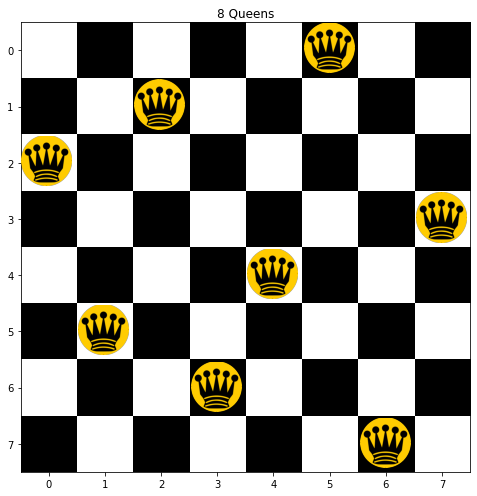

In [20]:
from utils import plot_NQueens
ngen = 1000
init_size = 120
mutation_rate = 0.08

n = 8
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)
print('solution:' ,solution)
plot_NQueens(solution.tolist())

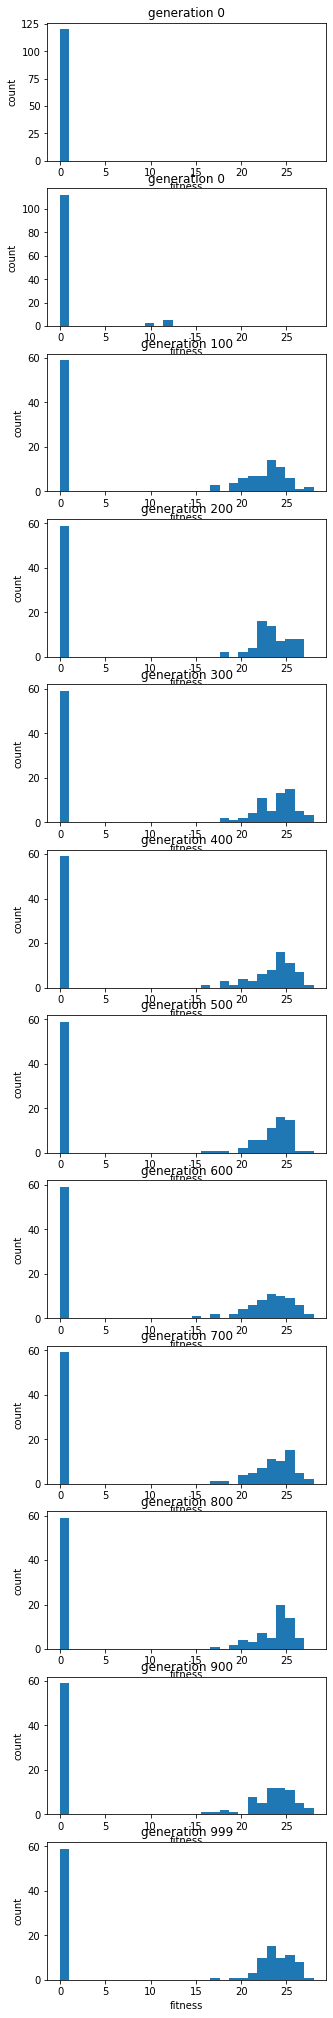

In [18]:
# visualize the evolution of the population
from utils import plot_evolution
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)

## 3. TSP Problem
For the problem:

1. Representation: path permutation, e.g. (a->b->c->...->z->a)
2. Factorial Search Space: $n!$ where $n$ is the number of cities

For GA/EA:

1. How to do cross-over on paths?
3. How to apply mutation?

In [ ]:
class TSP(GAProblem):
    def __init__(self, cities):
        self.cities = cities
        self.n_cities = len(cities)

    def init_population(self, pop_size):
        pop = []
        for _ in range(pop_size):
            pop.append(np.random.permutation(range(self.n_cities)).tolist())
        return pop

    def fitness(self, path):
        cities = self.cities[path]
        cost = np.sum(np.linalg.norm(cities - np.roll(cities, 1, axis=0), axis=1))
        return 1 / cost

    def reproduce(self, population, mutation_rate):
        raise NotImplementedError()

    def replacement(self, old, new):
        return new

rng = np.random.default_rng(303)
cities = rng.random((16, 2))

problem = TSP(cities)